<a href="https://colab.research.google.com/github/KimGriezmann/Bigcontest_2021/blob/master/working_space_JaeHong/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,309 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def create_df():

  #연도별 데이터 경로
  HTS_dir = '/content/drive/MyDrive/bigcontest/제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS'
  Player_dir = '/content/drive/MyDrive/bigcontest/제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수'
  Hitter_dir = '/content/drive/MyDrive/bigcontest/제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본'
  #단일 데이터 경로
  Team_dir = '/content/drive/MyDrive/bigcontest/제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv'
  Schedule_dir = '/content/drive/MyDrive/bigcontest/제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv'
  val_dir = '/content/drive/MyDrive/bigcontest/평가데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx'

  year = [2018, 2019, 2020, 2021]

  for i in year:
    globals()['HTS_{}'.format(i)]     = pd.read_csv(HTS_dir + '_' + str(i) + '.csv', encoding='CP949')
    globals()['Player_{}'.format(i)]  = pd.read_csv(Player_dir + '_' + str(i) + '.csv', encoding='CP949')
    globals()['Hitter_{}'.format(i)]  = pd.read_csv(Hitter_dir + '_' + str(i) + '.csv', encoding='CP949')

  global Team_df, Schedule_df, val_df
  Team_df = pd.read_csv(Team_dir, encoding='CP949')
  Schedule_df = pd.read_csv(Schedule_dir, encoding='CP949')
  val_df = pd.read_excel(val_dir)

######################

#연도별 데이터 하나로 통합
def concat_df():
  df_list = ['HTS', 'Player', 'Hitter']

#각 칼럼이 모두 같은지 검사 후 통합
  for i in df_list:
    if ((globals()['{}_2018'.format(i)].columns == globals()['{}_2019'.format(i)].columns).all()) and ((globals()['{}_2019'.format(i)].columns == globals()['{}_2020'.format(i)].columns).all()) and \
    ((globals()['{}_2020'.format(i)].columns == globals()['{}_2021'.format(i)].columns).all()):
      globals()['{}_df'.format(i)] = pd.concat( [ globals()['{}_2018'.format(i)], globals()['{}_2019'.format(i)], globals()['{}_2020'.format(i)], globals()['{}_2021'.format(i) ] ] )

#연도별 길이의 합이 통합된 데이터의 길이와 같은지 검사
  for i in df_list:
    if len(globals()['{}_2018'.format(i)]) + len(globals()['{}_2019'.format(i)]) + len(globals()['{}_2020'.format(i)]) + len(globals()['{}_2021'.format(i)]) == len(globals()['{}_df'.format(i)]):
      print('{} is complete!'.format(i))

######################

create_df()
concat_df()

HTS is complete!
Player is complete!
Hitter is complete!


In [5]:
df_2018 = pd.read_csv('/content/drive/MyDrive/bigcontest/add_hts_2018.csv', encoding='CP949')
df_2019 = pd.read_csv('/content/drive/MyDrive/bigcontest/add_hts_2019.csv', encoding='CP949')
df_2020 = pd.read_csv('/content/drive/MyDrive/bigcontest/add_hts_2020.csv', encoding='CP949')
df_2021 = pd.read_csv('/content/drive/MyDrive/bigcontest/add_hts_2021.csv', encoding='CP949')

In [6]:
# 분할 함수
def order(df, period, interval, del_cri, except_print):

    first_date = df.sort_values('DATE').reset_index(drop=True).loc[0,'DATE']

    last_date = df.sort_values('DATE').reset_index(drop=True).loc[len(df)-1, 'DATE']

    # 결과값 저장할 데이터프레임 생성
    home_split = pd.DataFrame()
    away_split = pd.DataFrame()

    while True:
        
        start_date = str(first_date)

        end_date = datetime.datetime.strptime(start_date, '%Y%m%d')
        end_date = end_date + datetime.timedelta(days=period)
        end_date = end_date.strftime('%Y%m%d')

        pred_date = datetime.datetime.strptime(end_date, '%Y%m%d')
        pred_date = pred_date + datetime.timedelta(days=24)
        pred_date = pred_date.strftime('%Y%m%d')

        if int(pred_date) >= last_date:
            print('가져오는 날짜{}가 마지막 날짜{} 이후의 데이터입니다.'.format(pred_date, last_date))
            break

        # 해당 시즌 타자 목록 (name -> pcode)
        hitter_list = list(set(df['PCODE']))

        # 더해줄 칼럼 목록 (avg, obp, slg, ops, avLI, RE24 제외)
        target_col = ['ab', 'score', 'hit', '2_hit', '3_hit', 'homerun', 'tb', 'rbi', 'sb', 'cs', 'bb', 'hpp', 'ibb', 'so', 'gdp', 'sh', 'sf', 'pitch', 'WPA', 'power_barrel', 'contact_barrel', 'clutch_barrel']

        # start_date 이후의 경기만 추출
        tr_df = df[ (df['DATE'] >= int(start_date)) & (df['DATE'] <= int(end_date)) ]
        ts_df = df[ (df['DATE'] > int(end_date)) & (df['DATE'] <= int(pred_date)) ]

        # first_date + interval
        first_date = datetime.datetime.strptime(start_date, '%Y%m%d')
        first_date = first_date + datetime.timedelta(days=interval)
        first_date = first_date.strftime('%Y%m%d')

        # 타자 한명씩 추출
        for player in hitter_list:

            tr_pl_data = tr_df[tr_df['PCODE'] == player]
            ts_pl_data = ts_df[ts_df['PCODE'] == player]

            away_tr = tr_pl_data[ tr_pl_data['vs'].str.contains('@') ]
            home_tr = tr_pl_data[ tr_pl_data['vs'].str.contains('@')  == False ]

            away_ts = ts_pl_data[ ts_pl_data['vs'].str.contains('@') ]
            home_ts = ts_pl_data[ ts_pl_data['vs'].str.contains('@')  == False ]

            if (len(away_tr) < del_cri) | (len(home_tr) < del_cri) | (len(away_ts) < 3.5) | (len(home_ts) < 3.5) :
                if except_print == True:
                    print('{}은/는 경기 수가 {}개보다 작기 때문에 삭제'.format(player, del_cri))
                continue

            else:

                # tr_data의 타겟 칼럼을 모두 합해서 저장
                home_sum = home_tr.loc[:, target_col].sum()
                away_sum = away_tr.loc[:, target_col].sum()
                # 어떤 선수인지 저장 (name -> pcode)
                home_sum['PCODE'] = player
                away_sum['PCODE'] = player

                home_sum['NAME'] = tr_pl_data.iloc[0,0]
                away_sum['NAME'] = tr_pl_data.iloc[0,0]

                # ts_data의 성적들로 avg, slg, obp, ops 라벨 생성
                home_ts_sum = home_ts.loc[:, target_col].sum()
                away_ts_sum = away_ts.loc[:, target_col].sum()

                home_sum['avg_label'] = home_ts_sum['hit'] / home_ts_sum['ab'] if home_ts_sum['ab'] != 0 else 0
                home_sum['slg_label'] = home_ts_sum['tb'] / home_ts_sum['ab'] if home_ts_sum['ab'] != 0 else 0
                home_sum['obp_label'] = (home_ts_sum['hit'] + home_ts_sum['bb'] + home_ts_sum['hpp']) / (home_ts_sum['ab'] +  home_ts_sum['bb'] + home_ts_sum['hpp'] + home_ts_sum['sf'])
                home_sum['ops_label'] = home_sum['slg_label'] + home_sum['obp_label']

                away_sum['avg_label'] = away_ts_sum['hit'] / away_ts_sum['ab'] if away_ts_sum['ab'] != 0 else 0
                away_sum['slg_label'] = away_ts_sum['tb'] / away_ts_sum['ab'] if away_ts_sum['ab'] != 0 else 0
                away_sum['obp_label'] = (away_ts_sum['hit'] + away_ts_sum['bb'] + away_ts_sum['hpp']) / (away_ts_sum['ab'] +  away_ts_sum['bb'] + away_ts_sum['hpp'] + away_ts_sum['sf'])
                away_sum['ops_label'] = away_sum['slg_label'] + away_sum['obp_label']

                # Series 데이터를 DataFrame 형식으로 변환
                home_result = home_sum.to_frame().transpose()
                away_result = away_sum.to_frame().transpose()
                    
                # 이 선수 데이터를 전체 데이터셋에 추가
                home_split = pd.concat([home_split, home_result])
                away_split = pd.concat([away_split, away_result])
            
    # 데이터셋 인덱스 초기화
    home_split = home_split.reset_index(drop=True)
    away_split = away_split.reset_index(drop=True)
            
    return home_split, away_split

In [76]:
home_2018, away_2018 = order(df_2018, period = 50, interval = 7, del_cri= 10, except_print = False)

가져오는 날짜20181017가 마지막 날짜20181014 이후의 데이터입니다.


In [60]:
home_2019, away_2019 = order(df_2019, period = 50, interval = 7, del_cri= 10, except_print = False)

가져오는 날짜20191002가 마지막 날짜20191001 이후의 데이터입니다.


In [61]:
home_2020, away_2020 = order(df_2020, period = 50, interval = 7, del_cri= 10, except_print = False)

가져오는 날짜20201031가 마지막 날짜20201031 이후의 데이터입니다.


In [123]:
home_2021, away_2021 = order(df_2021, period = 50, interval = 7, del_cri= 10, except_print = False)

가져오는 날짜20210714가 마지막 날짜20210711 이후의 데이터입니다.


### **Pre-processing**

In [11]:
#전처리 코드 다 합친 것(원본 유지)
def cal_feature(data):

    new_data = data.copy()

    new_data['avg'] = new_data.apply(lambda x: round(x['hit'] / x['ab'], 3) if x['ab'] != 0 else 0, axis=1)
    new_data['obp'] = new_data.apply(lambda x: round((x['hit'] + x['bb'] + x['hpp']) / (x['ab'] + x['bb'] + x['hpp'] + x['sf']), 3) if (x['ab'] + x['bb'] + x['hpp'] + x['sf']) != 0 else 0, axis=1)
    new_data['slg'] = new_data.apply(lambda x: round(x['tb'] / x['ab'], 3) if x['ab'] != 0 else 0, axis=1)
    new_data['ops'] = new_data['obp'] + new_data['slg']
    new_data['pa'] = new_data['ab'] + new_data['bb'] + new_data['sf']
    new_data['1_hit'] = new_data['hit'] - new_data['2_hit'] - new_data['3_hit'] - new_data['homerun']
    new_data['xh'] = new_data['2_hit'] + new_data['3_hit'] + new_data['homerun']


    new_data['babib'] = new_data.apply(lambda x: round((x['hit'] - x['homerun']) / (x['ab'] - x['so'] - x['homerun'] + x['sf']), 3) if (x['ab'] - x['so'] - x['homerun'] + x['sf']) != 0 else 0, axis=1)
    new_data['pitch/pa'] = new_data.apply(lambda x: round(x['pitch'] / x['pa'], 2) if x['pa'] != 0 else 0, axis=1)
    new_data['cq'] = new_data.apply(lambda x: round((0.5 * x['hit'] + 0.3 * x['tb']) / (x['ab'] - x['so']), 3) if (x['ab'] - x['so']) != 0 else 0, axis=1)
    new_data['b/k'] = new_data.apply(lambda x: round(x['bb'] / x['so'], 3) if x['so'] != 0 else 0, axis=1)
    new_data['IsoP'] = new_data['slg'] - new_data['avg']
    new_data['IsoD'] = new_data['obp'] - new_data['avg']
    new_data['psn'] = new_data.apply(lambda x: round((2 * x['homerun'] * x['sb']) / (x['homerun'] + x['sb']), 3) if (x['homerun'] + x['sb']) != 0 else 0, axis=1)
    new_data['hr%'] = new_data.apply(lambda x: round(x['homerun'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
    new_data['kk%'] = new_data.apply(lambda x: round(x['so'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
    new_data['bb%'] = new_data.apply(lambda x: round(x['bb'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
    new_data['xh/ab'] = new_data.apply(lambda x: round(x['xh'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
    new_data['xh/h'] = new_data.apply(lambda x: round(x['xh'] / x['hit'], 3) if x['hit'] != 0 else 0, axis=1)
    new_data['hr/xh'] = new_data.apply(lambda x: round(x['homerun'] / x['xh'], 3) if x['xh'] != 0 else 0, axis=1)
    new_data['pa/hr'] = new_data.apply(lambda x: round(x['pa'] / x['homerun'], 3) if x['homerun'] != 0 else 0, axis=1)
    new_data['ab/hr'] = new_data.apply(lambda x: round(x['ab'] / x['homerun'], 3) if x['homerun'] != 0 else 0, axis=1)
    new_data['ueqr'] = new_data.apply(lambda x: round((x['hit'] + x['tb'] + 1.5*(x['bb'] + x['hpp'] + x['sb']) + x['sh'] + x['sf'] - x['ibb']/2) / (x['ab'] + x['bb'] + x['hpp'] + x['sh'] + x['sf'] + x['cs'] + x['sb']), 3) if (x['ab'] + x['bb'] + x['hpp'] + x['sh'] + x['sf'] + x['cs'] + x['sb']) != 0 else 0, axis=1)
    new_data['wOBA'] = new_data.apply(lambda x: round((0.72 * x['bb'] + 0.75 * x['hpp'] + 0.9 * x['1_hit'] + 1.24 * x['2_hit'] + 1.56 * x['3_hit'] + 1.95 * x['homerun']) / (x['pa'] - x['ibb']), 3) if (x['pa'] - x['ibb']) != 0 else 0, axis=1)


    new_data['score'] = round((new_data['score'] / new_data['pa']).astype(float), 3)
    new_data['hit'] = round((new_data['hit'] / new_data['pa']).astype(float), 3)
    new_data['1_hit'] = round((new_data['1_hit'] / new_data['pa']).astype(float), 3)
    new_data['xh'] = round((new_data['xh'] / new_data['pa']).astype(float), 3)
    new_data['2_hit'] = round((new_data['2_hit'] / new_data['pa']).astype(float), 3)
    new_data['3_hit'] = round((new_data['3_hit'] / new_data['pa']).astype(float), 3)
    new_data['homerun'] = round((new_data['homerun'] / new_data['pa']).astype(float), 3)
    new_data['tb'] = round((new_data['tb'] / new_data['pa']).astype(float), 3)
    new_data['rbi'] = round((new_data['rbi'] / new_data['pa']).astype(float), 3)
    new_data['sb'] = round((new_data['sb'] / new_data['pa']).astype(float), 3)
    new_data['cs'] = round((new_data['cs'] / new_data['pa']).astype(float), 3)
    new_data['bb'] = round((new_data['bb'] / new_data['pa']).astype(float), 3)
    new_data['hpp'] = round((new_data['hpp'] / new_data['pa']).astype(float), 3)
    new_data['ibb'] = round((new_data['ibb'] / new_data['pa']).astype(float), 3)
    new_data['so'] = round((new_data['so'] / new_data['pa']).astype(float), 3)
    new_data['gdp'] = round((new_data['gdp'] / new_data['pa']).astype(float), 3)
    new_data['sh'] = round((new_data['sh'] / new_data['pa']).astype(float), 3)
    new_data['sf'] = round((new_data['sf'] / new_data['pa']).astype(float), 3)
    new_data['WPA'] = round((new_data['WPA'] / new_data['pa']).astype(float), 3)
    new_data['power_barrel'] = round((new_data['power_barrel'] / new_data['pa']).astype(float), 3)
    new_data['contact_barrel'] = round((new_data['contact_barrel'] / new_data['pa']).astype(float), 3)
    new_data['clutch_barrel'] = round((new_data['clutch_barrel'] / new_data['pa']).astype(float), 3)

    return new_data

In [ ]:
#누락된 출루율 계산
#타석(PA) 열 추가 / PA = 타수 + 볼넷 + 희비
#1루타(1_hit) 열 추가 / 1_hit = hit - 2_hit - 3_hit - homerun
#장타(XH) 열 추가 / XH = 2_hit + 3_hit + homerun
def first_pre(data):
  avg = data['hit'] / data['ab']
  obp = (data['hit'] + data['bb'] + data['hpp']) / (data['ab'] + data['bb'] + data['hpp'] + data['sf'])
  slg = data['tb'] / data['ab']
  pa = data['ab'] + data['bb'] + data['sf']
  hit_1 = data['hit'] - data['2_hit'] - data['3_hit'] - data['homerun']
  xh = data['2_hit'] + data['3_hit'] + data['homerun']

  data['avg'] = avg
  data['obp'] = obp
  data['slg'] = slg
  data['ops'] = obp + slg
  data['pa'] = pa
  data['1_hit'] = hit_1
  data['xh'] = xh

  return data

In [ ]:
def cal_feature(data):

  data['babib'] = data.apply(lambda x: round((x['hit'] - x['homerun']) / (x['ab'] - x['so'] - x['homerun'] + x['sf']), 3) if (x['ab'] - x['so'] - x['homerun'] + x['sf']) != 0 else 0, axis=1)
  data['pitch/pa'] = data.apply(lambda x: round(x['pitch'] / x['pa'], 2) if x['pa'] != 0 else 0, axis=1)
  data['cq'] = data.apply(lambda x: round((0.5 * x['hit'] + 0.3 * x['tb']) / (x['ab'] - x['so']), 3) if (x['ab'] - x['so']) != 0 else 0, axis=1)
  data['b/k'] = data.apply(lambda x: round(x['bb'] / x['so'], 3) if x['so'] != 0 else 0, axis=1)
  data['IsoP'] = data['slg'] - data['avg']
  data['IsoD'] = data['obp'] - data['avg']
  data['psn'] = data.apply(lambda x: round((2 * x['homerun'] * x['sb']) / (x['homerun'] + x['sb']), 3) if (x['homerun'] + x['sb']) != 0 else 0, axis=1)
  data['hr%'] = data.apply(lambda x: round(x['homerun'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
  data['kk%'] = data.apply(lambda x: round(x['so'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
  data['bb%'] = data.apply(lambda x: round(x['bb'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
  data['xh/ab'] = data.apply(lambda x: round(x['xh'] / x['pa'], 3) if x['pa'] != 0 else 0, axis=1)
  data['xh/h'] = data.apply(lambda x: round(x['xh'] / x['hit'], 3) if x['hit'] != 0 else 0, axis=1)
  data['hr/xh'] = data.apply(lambda x: round(x['homerun'] / x['xh'], 3) if x['xh'] != 0 else 0, axis=1)
  data['pa/hr'] = data.apply(lambda x: round(x['pa'] / x['homerun'], 3) if x['homerun'] != 0 else 0, axis=1)
  data['ab/hr'] = data.apply(lambda x: round(x['ab'] / x['homerun'], 3) if x['homerun'] != 0 else 0, axis=1)
  data['ueqr'] = data.apply(lambda x: round((x['hit'] + x['tb'] + 1.5*(x['bb'] + x['hpp'] + x['sb']) + x['sh'] + x['sf'] - x['ibb']/2) / (x['ab'] + x['bb'] + x['hpp'] + x['sh'] + x['sf'] + x['cs'] + x['sb']), 3) if (x['ab'] + x['bb'] + x['hpp'] + x['sh'] + x['sf'] + x['cs'] + x['sb']) != 0 else 0, axis=1)
  data['wOBA'] = data.apply(lambda x: round((0.72 * x['bb'] + 0.75 * x['hpp'] + 0.9 * x['1_hit'] + 1.24 * x['2_hit'] + 1.56 * x['3_hit'] + 1.95 * x['homerun']) / (x['pa'] - x['ibb']), 3) if (x['pa'] - x['ibb']) != 0 else 0, axis=1)
  
  return data

In [ ]:
def make_percentage(data):
  data['hit'] = data['hit'] / data['pa']
  data['1_hit'] = data['1_hit'] / data['pa']
  data['xh'] = data['xh'] / data['pa']
  data['2_hit'] = data['2_hit'] / data['pa']
  data['3_hit'] = data['3_hit'] / data['pa']
  data['homerun'] = data['homerun'] / data['pa']
  data['tb'] = data['tb'] / data['pa']
  data['rbi'] = data['rbi'] / data['pa']
  data['sb'] = data['sb'] / data['pa']
  data['cs'] = data['cs'] / data['pa']
  data['bb'] = data['bb'] / data['pa']
  data['hpp'] = data['hpp'] / data['pa']
  data['ibb'] = data['ibb'] / data['pa']
  data['so'] = data['so'] / data['pa']
  data['gdp'] = data['gdp'] / data['pa']
  data['sh'] = data['sh'] / data['pa']
  data['sf'] = data['sf'] / data['pa']
  data['WPA'] = data['WPA'] / data['pa']
  data['power_barrel'] = data['power_barrel'] / data['pa']
  data['contact_barrel'] = data['contact_barrel'] / data['pa']
  data['clutch_barrel'] = data['clutch_barrel'] / data['pa']

  return data

### **Create data with pre-processing**

In [124]:
home_data_2021 = cal_feature(home_2021)
away_data_2021 = cal_feature(away_2021)

In [125]:
home_data_2021 = home_data_2021[home_data_2021['ab']>30]
away_data_2021 = away_data_2021[away_data_2021['ab']>30]

In [79]:
home_data_2020 = cal_feature(home_2020)
away_data_2020 = cal_feature(away_2020)

In [80]:
home_data_2020 = home_data_2020[home_data_2020['ab']>30]
away_data_2020 = away_data_2020[away_data_2020['ab']>30]

In [81]:
home_data_2019 = cal_feature(home_2019)
away_data_2019 = cal_feature(away_2019)

In [82]:
home_data_2019 = home_data_2019[home_data_2019['ab']>30]
away_data_2019 = away_data_2019[away_data_2019['ab']>30]

In [83]:
home_data_2018 = cal_feature(home_2018)
away_data_2018 = cal_feature(away_2018)

In [84]:
home_data_2018 = home_data_2018[home_data_2018['ab']>30]
away_data_2018 = away_data_2018[away_data_2018['ab']>30]

In [ ]:
home_data_2020.loc[home_data_2020['NAME']=='양의지']

### **Filter Method**

In [126]:
frames = [home_data_2018, home_data_2019, home_data_2020, home_data_2021]
new_home_data = pd.concat(frames)

In [130]:
away_frames = [away_data_2018, away_data_2019, away_data_2020, away_data_2021]
new_away_data = pd.concat(away_frames)

In [132]:
new_away_data.shape

(3364, 52)

In [162]:
new_df = new_home_data.loc[:, ['tb', 'rbi', 'sb', 'sh', 'sf', 'WPA', 'avg', 'obp', 'slg', 'power_barrel', 'contact_barrel', 'clutch_barrel', 'xh', 'babib', 'pitch/pa', 'cq', 'b/k', 'IsoP', 'IsoD', 'psn', 'hr%', 'kk%', 'bb%', 'xh/h', 'hr/xh', 'ueqr','wOBA', 'ops', 'ops_label']]

In [163]:
new_df = new_df.astype('float64')

In [164]:
new_df.shape

(3352, 29)

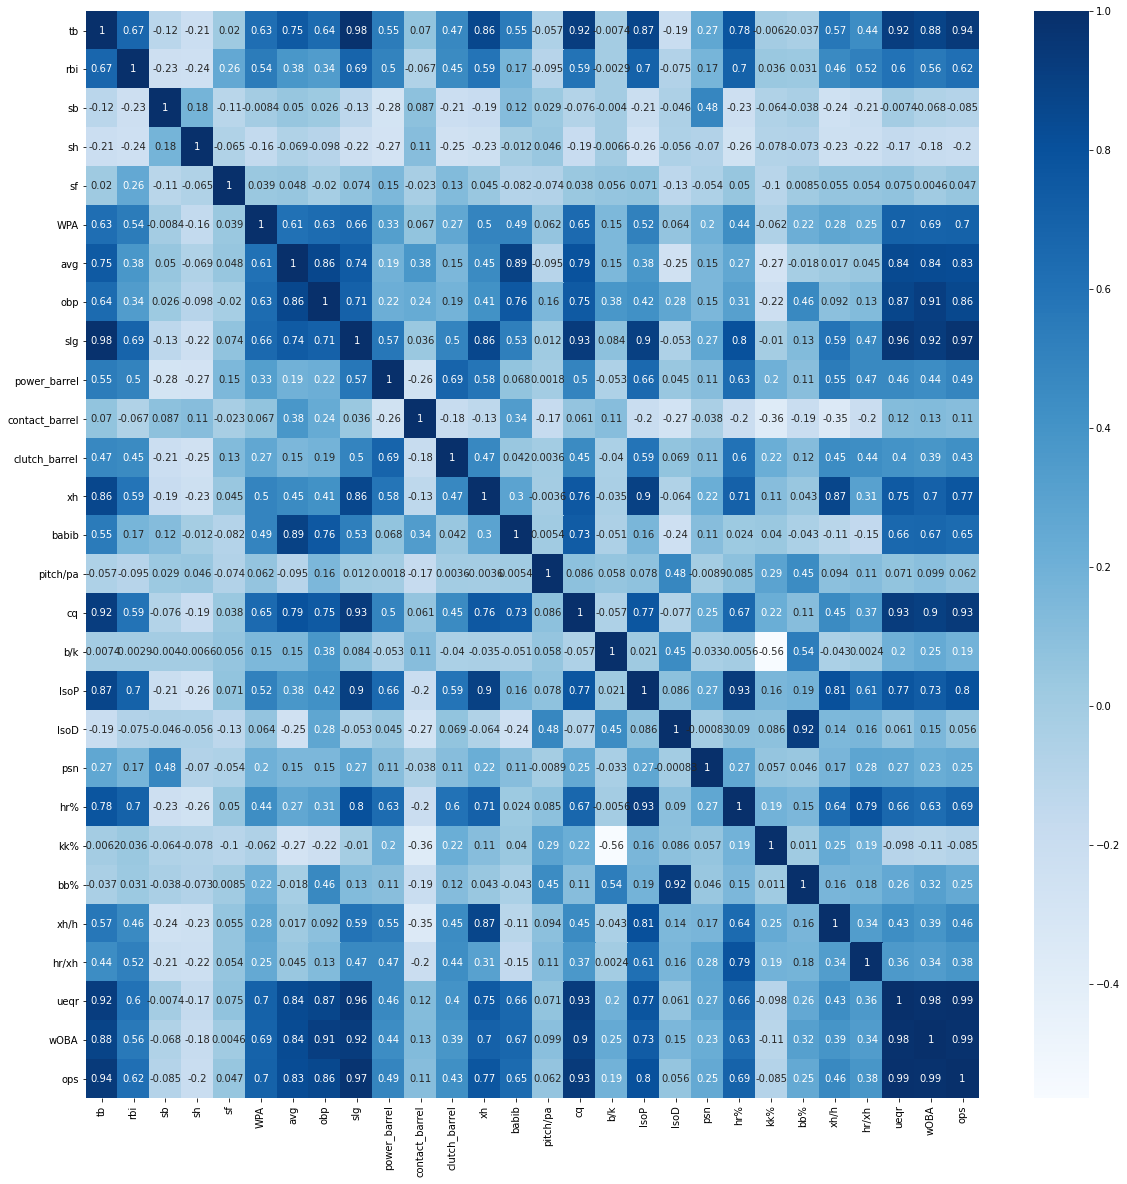

In [119]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [122]:
#Correlation with output variable
cor_target = abs(cor["ops"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

tb               0.935739
rbi              0.615624
WPA              0.695583
avg              0.833738
obp              0.856368
slg              0.970168
power_barrel     0.487266
clutch_barrel    0.425200
xh               0.769301
babib            0.645215
cq               0.933592
IsoP             0.800792
hr%              0.689403
xh/h             0.464553
ueqr             0.993282
wOBA             0.986036
ops              1.000000
Name: ops, dtype: float64

In [141]:
vif_df = new_df.loc[:, ['tb', 'rbi', 'WPA', 'power_barrel', 'clutch_barrel', 'xh', 'babib', 'cq', 'IsoP', 'hr%', 'xh/h', 'ueqr','wOBA']]

In [142]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
vif["features"] = vif_df.columns
vif

,VIF Factor,features
0,479.807121,tb
1,12.399965,rbi
2,2.257650,WPA
3,7.414369,power_barrel
4,3.283042,clutch_barrel
5,189.146956,xh
6,2269.471588,babib
7,2522.786035,cq
8,465.972213,IsoP
9,89.250060,hr%


In [146]:
# babib 변수 제거 후 vif 확인

vif = pd.DataFrame()
vif_df_2 = vif_df.drop("babib",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(vif_df_2.values, i) for i in range(vif_df_2.shape[1])]
vif["features"] = vif_df_2.columns
vif

,VIF Factor,features
0,360.421782,tb
1,11.983037,rbi
2,2.243203,WPA
3,7.398961,power_barrel
4,3.232613,clutch_barrel
5,178.030860,xh
6,157.509038,cq
7,244.733993,IsoP
8,66.084120,hr%
9,40.140386,xh/h


In [147]:
#ueqr 변수 제거 후 vif 확인

vif = pd.DataFrame()
vif_df_3 = vif_df_2.drop("ueqr",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(vif_df_3.values, i) for i in range(vif_df_3.shape[1])]
vif["features"] = vif_df_3.columns
vif

,VIF Factor,features
0,298.181130,tb
1,11.810304,rbi
2,2.233229,WPA
3,7.398903,power_barrel
4,3.220882,clutch_barrel
5,164.168580,xh
6,152.339905,cq
7,238.385036,IsoP
8,62.370766,hr%
9,37.625955,xh/h


In [148]:
#tb 변수 제거 후 vif 확인

vif = pd.DataFrame()
vif_df_4 = vif_df_3.drop("tb",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(vif_df_4.values, i) for i in range(vif_df_4.shape[1])]
vif["features"] = vif_df_4.columns
vif

,VIF Factor,features
0,11.260952,rbi
1,2.131213,WPA
2,7.394120,power_barrel
3,3.191468,clutch_barrel
4,90.899396,xh
5,123.346699,cq
6,223.144742,IsoP
7,52.582984,hr%
8,28.282661,xh/h
9,107.135311,wOBA


In [149]:
#IsoP 변수 제거 후 vif 확인

vif = pd.DataFrame()
vif_df_5 = vif_df_4.drop("IsoP",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(vif_df_5.values, i) for i in range(vif_df_5.shape[1])]
vif["features"] = vif_df_5.columns
vif

,VIF Factor,features
0,11.102439,rbi
1,1.988877,WPA
2,7.380824,power_barrel
3,3.173185,clutch_barrel
4,40.637681,xh
5,122.162941,cq
6,5.978528,hr%
7,26.934979,xh/h
8,104.337521,wOBA


In [150]:
#cq 변수 제거 후 vif 확인

vif = pd.DataFrame()
vif_df_6 = vif_df_5.drop("cq",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(vif_df_6.values, i) for i in range(vif_df_6.shape[1])]
vif["features"] = vif_df_6.columns
vif

,VIF Factor,features
0,11.044058,rbi
1,1.975490,WPA
2,7.370044,power_barrel
3,3.148675,clutch_barrel
4,35.058424,xh
5,5.966335,hr%
6,25.155583,xh/h
7,12.869841,wOBA


In [151]:
#xh 변수 제거 후 vif 확인

vif = pd.DataFrame()
vif_df_7 = vif_df_6.drop("xh",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(vif_df_7.values, i) for i in range(vif_df_7.shape[1])]
vif["features"] = vif_df_7.columns
vif

,VIF Factor,features
0,11.030941,rbi
1,1.660039,WPA
2,7.360776,power_barrel
3,3.148205,clutch_barrel
4,5.714392,hr%
5,9.433759,xh/h
6,11.328611,wOBA


In [165]:
from sklearn.model_selection import train_test_split

X = vif_df_7
y = new_df['ops_label']

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(2681, 7) (671, 7) (2681,) (671,)


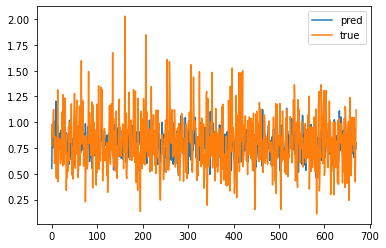

In [166]:
import statsmodels.api as sm

fit_train = sm.OLS(train_y,train_x)
fit_train = fit_train.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

In [167]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true = test_y, y_pred = fit_train.predict(test_x))
print(mse)

0.07569593206844337


### **Feature selection (SelectFromModel)**

In [67]:
home_data_2020

,ab,score,hit,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,pitch,WPA,power_barrel,contact_barrel,clutch_barrel,PCODE,NAME,avg_label,slg_label,obp_label,ops_label,avg,obp,slg,ops,pa,1_hit,xh,babib,pitch/pa,cq,b/k,IsoP,IsoD,psn,hr%,kk%,bb%,xh/ab,xh/h,hr/xh,pa/hr,ab/hr,ueqr,wOBA
0,103,0.153,0.324,0.090,0.009,0.018,0.486,0.144,0.000,0.000,0.054,0.000,0.009,0.108,0.018,0.000,0.018,396,0.002,0.162,0.144,0.045,76290,김현수,0.264706,0.323529,0.315789,0.639319,0.350,0.378,0.524,0.902,111,0.207,0.117,0.374,3.57,0.376,0.500,0.174,0.028,0.000,0.018,0.108,0.054,0.117,0.361,0.154,55.500,51.500,0.905,0.390
2,44,0.122,0.163,0.041,0.020,0.020,0.306,0.122,0.000,0.000,0.082,0.000,0.000,0.082,0.020,0.000,0.020,188,-0.002,0.020,0.082,0.000,64004,김민혁,0.454545,0.545455,0.454545,1,0.182,0.245,0.341,0.586,49,0.082,0.082,0.175,3.84,0.212,1.000,0.159,0.063,0.000,0.020,0.082,0.082,0.082,0.500,0.250,49.000,44.000,0.612,0.254
3,54,0.155,0.259,0.069,0.000,0.086,0.586,0.293,0.000,0.000,0.052,0.017,0.000,0.207,0.017,0.000,0.017,223,0.018,0.155,0.052,0.052,79365,박동원,0.264706,0.411765,0.358974,0.770739,0.278,0.322,0.630,0.952,58,0.103,0.155,0.263,3.84,0.421,0.250,0.352,0.044,0.000,0.086,0.207,0.052,0.155,0.600,0.556,11.600,10.800,0.949,0.397
4,83,0.133,0.256,0.022,0.011,0.011,0.333,0.100,0.067,0.033,0.067,0.011,0.000,0.133,0.000,0.011,0.011,384,-0.002,0.022,0.144,0.000,64006,심우준,0.314286,0.342857,0.333333,0.67619,0.277,0.330,0.361,0.691,90,0.211,0.044,0.310,4.27,0.289,0.500,0.084,0.053,1.714,0.011,0.133,0.067,0.044,0.174,0.250,90.000,83.000,0.738,0.313
5,76,0.181,0.349,0.096,0.000,0.072,0.663,0.289,0.000,0.000,0.084,0.000,0.000,0.145,0.036,0.000,0.000,305,0.007,0.120,0.084,0.048,69652,터커,0.315789,0.710526,0.458333,1.16886,0.382,0.434,0.724,1.158,83,0.181,0.169,0.397,3.67,0.484,0.583,0.342,0.052,0.000,0.072,0.145,0.084,0.169,0.483,0.429,13.833,12.667,1.139,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,48,0.240,0.420,0.020,0.000,0.000,0.440,0.100,0.000,0.000,0.040,0.060,0.000,0.060,0.020,0.040,0.000,202,0.004,0.020,0.300,0.000,78288,최재훈,0.55,0.65,0.64,1.29,0.438,0.491,0.458,0.949,50,0.400,0.020,0.467,4.04,0.380,0.667,0.020,0.053,0.000,0.000,0.060,0.040,0.020,0.048,0.000,0.000,0.000,0.955,0.459
1078,54,0.185,0.215,0.062,0.000,0.015,0.323,0.185,0.015,0.000,0.123,0.046,0.000,0.123,0.015,0.015,0.046,306,0.005,0.062,0.077,0.015,63963,권희동,0.269231,0.423077,0.387097,0.810174,0.259,0.368,0.389,0.757,65,0.138,0.077,0.271,4.71,0.289,1.000,0.130,0.109,1.000,0.015,0.123,0.123,0.077,0.357,0.200,65.000,54.000,0.814,0.354
1079,62,0.103,0.294,0.000,0.000,0.000,0.294,0.000,0.000,0.000,0.088,0.000,0.015,0.103,0.000,0.000,0.000,264,-0.005,0.059,0.132,0.000,74206,김재호,0.428571,0.535714,0.5,1.03571,0.323,0.382,0.323,0.705,68,0.294,0.000,0.364,3.88,0.291,0.857,0.000,0.059,0.000,0.000,0.103,0.088,0.000,0.000,0.000,0.000,0.000,0.713,0.333
1080,77,0.325,0.422,0.084,0.000,0.108,0.831,0.386,0.024,0.000,0.072,0.012,0.012,0.145,0.012,0.000,0.000,281,0.021,0.133,0.133,0.060,62947,나성범,0.2,0.28,0.230769,0.510769,0.455,0.500,0.896,1.396,83,0.229,0.193,0.464,3.39,0.588,0.500,0.441,0.045,3.273,0.108,0.145,0.072,0.193,0.457,0.562,9.222,8.556,1.360,0.590


In [ ]:
X_train = home_data_2021.loc[:, ['hit', '1_hit', '2_hit', '3_hit', 'tb' , 'rbi', 'sb', 'cs', 'hpp', 'ibb', 'gdp', 'sh', 'sf', 'WPA', 'power_barrel', 'contact_barrel', 'clutch_barrel', 'avg', 'obp','slg', 'ops', 'xh', 'babib', 'pitch/pa', 'cq', 'b/k', 'IsoP', 'IsoD', 'psn', 'hr%', 'kk%', 'bb%', 'xh/h', 'hr/xh', 'ueqr', 'wOBA' ]]
y_train = home_data_2021.loc[:, ['ops_label']]

In [71]:
#불필요한 변수 제외
X_train = home_data_2020.loc[:, ['tb', 'rbi', 'sb', 'sh', 'sf', 'WPA', 'power_barrel', 'contact_barrel', 'clutch_barrel', 'avg', 'obp','slg', 'ops', 'xh', 'babib', 'pitch/pa', 'cq', 'b/k', 'IsoP', 'IsoD', 'psn', 'hr%', 'kk%', 'bb%', 'xh/h', 'hr/xh', 'ueqr', 'wOBA' ]]
y_train = home_data_2020.loc[:, ['ops_label']]

In [72]:
X_train.shape

(1057, 27)

In [73]:
from sklearn.ensemble import RandomForestRegressor

etc_model = RandomForestRegressor()
etc_model.fit(X_train, y_train)

print(etc_model.feature_importances_)
feature_list = pd.concat([pd.Series(X_train.columns), pd.Series(etc_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending = False)[:15]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.04269663 0.04929768 0.02800163 0.03753168 0.03469143 0.04305752
 0.09366456 0.05960987 0.03503277 0.029215   0.03177218 0.02204464
 0.03304418 0.03168159 0.04410395 0.03021274 0.04976709 0.03137568
 0.03575765 0.00866285 0.0251932  0.05121981 0.03302006 0.03679548
 0.03563511 0.02329211 0.02362289]


,features_name,importance
6,power_barrel,0.093665
7,contact_barrel,0.059610
21,kk%,0.051220
16,b/k,0.049767
1,rbi,0.049298
14,pitch/pa,0.044104
5,WPA,0.043058
0,tb,0.042697
3,sh,0.037532
23,xh/h,0.036795


In [74]:
from sklearn.ensemble import ExtraTreesRegressor

etc_model = ExtraTreesRegressor()
etc_model.fit(X_train, y_train)

print(etc_model.feature_importances_)
feature_list = pd.concat([pd.Series(X_train.columns), pd.Series(etc_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending = False)[:15]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.04087446 0.04471004 0.03288641 0.04685334 0.04932926 0.04097553
 0.07095084 0.0423412  0.04317741 0.02654949 0.02876625 0.02685029
 0.03398576 0.02899454 0.03788994 0.03493414 0.03369349 0.0359966
 0.03403839 0.02291978 0.03262588 0.03947392 0.03532646 0.03821384
 0.0451274  0.02553573 0.02697961]


,features_name,importance
6,power_barrel,0.070951
4,sf,0.049329
3,sh,0.046853
24,hr/xh,0.045127
1,rbi,0.044710
8,clutch_barrel,0.043177
7,contact_barrel,0.042341
5,WPA,0.040976
0,tb,0.040874
21,kk%,0.039474


### **다중공선성 확인**

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,9.745228e+03,tb
1,1.481829e+01,rbi
2,7.594047e+00,sb
3,1.659107e+00,sh
4,1.076203e+01,sf
5,2.881281e+00,WPA
6,8.595903e+00,power_barrel
7,1.075001e+01,contact_barrel
8,3.531210e+00,clutch_barrel
9,inf,avg


### **try scatter plot but..**

In [ ]:
home_data_1_2021 = first_pre(home_2021)
away_data_1_2021 = first_pre(away_2021)

In [ ]:
home_data_2_2021 = cal_feature(home_data_1_2021)
away_data_2_2021 = cal_feature(away_data_1_2021)

In [ ]:
home_data_3_2021 = make_percentage(home_data_2_2021)
away_data_3_2021 = make_percentage(away_data_2_2021)

In [ ]:
#period = 50 / interval = 7 / del_cri = 8로 정한 탐색할 2021시즌 홈 데이터
home_data_3_2021

,ab,score,hit,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,pitch,WPA,power_barrel,contact_barrel,clutch_barrel,PCODE,NAME,avg_label,slg_label,obp_label,ops_label,avg,obp,slg,ops,pa,1_hit,xh,babib,pitch/pa,cq,b/k,IsoP,IsoD,psn,hr%,kk%,bb%,xh/ab,xh/h,hr/xh,pa/hr,ab/hr,ueqr,wOBA
0,70,8,0.214286,0.047619,0,0.0238095,0.333333,0.166667,0,0,0.119048,0,0.0119048,0.0833333,0.0119048,0,0.047619,330,0.00786905,0.178571,0.0714286,0.0595238,76290,김현수,0.368421,0.473684,0.428571,0.902256,0.257143,0.333333,0.4,0.733333,84,0.142857,0.0714286,0.246,3.93,0.276,1.429,0.142857,0.0761905,0.000,0.024,0.083,0.119,0.071,0.333,0.333,42.0,35.0,0.768,0.324
1,33,2,0.179487,0.025641,0,0,0.205128,0.025641,0.025641,0,0.128205,0,0,0.0769231,0.0512821,0.025641,0.025641,131,-0.00174359,0,0.0512821,0,76802,김성현,0.2,0.2,0.428571,0.628571,0.212121,0.307692,0.242424,0.550117,39,0.153846,0.025641,0.226,3.36,0.197,1.667,0.030303,0.0955711,0.000,0.000,0.077,0.128,0.026,0.143,0.000,0.0,0.0,0.634,0.263
2,59,13,0.298507,0.0746269,0,0.0149254,0.41791,0.134328,0.0298507,0.0149254,0.0746269,0.0149254,0,0.179104,0,0,0.0447761,279,0.00244776,0.0149254,0.104478,0,64006,심우준,0.363636,0.590909,0.416667,1.00758,0.338983,0.382353,0.474576,0.856929,67,0.208955,0.0895522,0.388,4.16,0.391,0.417,0.135593,0.0433699,1.333,0.015,0.179,0.075,0.090,0.300,0.167,67.0,59.0,0.887,0.375
3,37,9,0.27907,0.0697674,0,0.0465116,0.488372,0.186047,0.0232558,0,0.116279,0.0465116,0,0.27907,0,0.0465116,0.0232558,199,0.0131395,0.116279,0.0465116,0,79365,박동원,0.25,0.375,0.368421,0.743421,0.324324,0.422222,0.567568,0.98979,43,0.162791,0.116279,0.417,4.63,0.492,0.417,0.243243,0.0978979,1.333,0.047,0.279,0.116,0.116,0.417,0.400,21.5,18.5,1.000,0.442
4,50,3,0.192308,0.115385,0,0,0.307692,0.0384615,0,0,0.0384615,0,0,0.173077,0.0769231,0,0,202,-0.0124231,0.0769231,0.115385,0,76812,이재원,0.142857,0.142857,0.2,0.342857,0.2,0.230769,0.32,0.550769,52,0.0769231,0.115385,0.244,3.88,0.239,0.222,0.12,0.0307692,0.000,0.000,0.173,0.038,0.115,0.600,0.000,0.0,0.0,0.558,0.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,42,9,0.354167,0.0208333,0,0.0625,0.5625,0.25,0,0,0.125,0,0,0.166667,0,0,0,192,0.013875,0.0833333,0.125,0,62931,노진혁,0.444444,0.592593,0.464286,1.05688,0.404762,0.479167,0.642857,1.12202,48,0.270833,0.0833333,0.452,4.00,0.488,0.750,0.238095,0.0744048,0.000,0.062,0.167,0.125,0.083,0.235,0.750,16.0,14.0,1.104,0.481
294,59,6,0.28125,0.03125,0,0,0.3125,0.078125,0,0.015625,0.078125,0,0.015625,0.078125,0.015625,0.015625,0,197,0.00878125,0.046875,0.15625,0,64984,김태진,0.304348,0.391304,0.392857,0.784161,0.305085,0.359375,0.338983,0.698358,64,0.25,0.03125,0.333,3.08,0.278,1.000,0.0338983,0.0542903,0.000,0.000,0.078,0.078,0.031,0.111,0.000,0.0,0.0,0.697,0.325
295,44,10,0.431373,0.0196078,0,0.0196078,0.509804,0.0784314,0,0,0.117647,0.0196078,0,0.0392157,0.0392157,0,0.0196078,233,0.00376471,0.0392157,0.176471,0,61404,김헌곤,0.333333,0.466667,0.375,0.841667,0.5,0.557692,0.590909,1.1486,51,0.392157,0.0392157,0.500,4.57,0.448,3.000,0.0909091,0.0576923,0.000,0.020,0.039,0.118,0.039,0.091,0.500,51.0,44.0,1.144,0.515
296,54,15,0.316667,0,0,0.1,0.616667,0.25,0.0166667,0,0.1,0.0333333,0,0.216667,0.0166667,0,0,246,0.01375,0.133333,0.133333,0.0833333,62947,나성범,0.333333,0.428571,0.348837,0.777409,0.351852,0.435484,0.685185,1.12067,60,0.216667,0.1,0.371,4.10,0.502,0.462,0.333333,0.083632,1.714,0.100,0.217,0.100,0.100,0.316,1.000,10.0,9.0,1.103,0.487


In [ ]:
home_data_4_2021 = home_data_3_2021[home_data_3_2021['ab']>30]
home_data_4_2021

,ab,score,hit,2_hit,3_hit,homerun,tb,rbi,sb,cs,bb,hpp,ibb,so,gdp,sh,sf,pitch,WPA,power_barrel,contact_barrel,clutch_barrel,PCODE,NAME,avg_label,slg_label,obp_label,ops_label,avg,obp,slg,ops,pa,1_hit,xh,babib,pitch/pa,cq,b/k,IsoP,IsoD,psn,hr%,kk%,bb%,xh/ab,xh/h,hr/xh,pa/hr,ab/hr,ueqr,wOBA
0,70,8,0.214286,0.047619,0,0.0238095,0.333333,0.166667,0,0,0.119048,0,0.0119048,0.0833333,0.0119048,0,0.047619,330,0.00786905,0.178571,0.0714286,0.0595238,76290,김현수,0.368421,0.473684,0.428571,0.902256,0.257143,0.333333,0.4,0.733333,84,0.142857,0.0714286,0.246,3.93,0.276,1.429,0.142857,0.0761905,0.000,0.024,0.083,0.119,0.071,0.333,0.333,42.0,35.0,0.768,0.324
1,33,2,0.179487,0.025641,0,0,0.205128,0.025641,0.025641,0,0.128205,0,0,0.0769231,0.0512821,0.025641,0.025641,131,-0.00174359,0,0.0512821,0,76802,김성현,0.2,0.2,0.428571,0.628571,0.212121,0.307692,0.242424,0.550117,39,0.153846,0.025641,0.226,3.36,0.197,1.667,0.030303,0.0955711,0.000,0.000,0.077,0.128,0.026,0.143,0.000,0.0,0.0,0.634,0.263
2,59,13,0.298507,0.0746269,0,0.0149254,0.41791,0.134328,0.0298507,0.0149254,0.0746269,0.0149254,0,0.179104,0,0,0.0447761,279,0.00244776,0.0149254,0.104478,0,64006,심우준,0.363636,0.590909,0.416667,1.00758,0.338983,0.382353,0.474576,0.856929,67,0.208955,0.0895522,0.388,4.16,0.391,0.417,0.135593,0.0433699,1.333,0.015,0.179,0.075,0.090,0.300,0.167,67.0,59.0,0.887,0.375
3,37,9,0.27907,0.0697674,0,0.0465116,0.488372,0.186047,0.0232558,0,0.116279,0.0465116,0,0.27907,0,0.0465116,0.0232558,199,0.0131395,0.116279,0.0465116,0,79365,박동원,0.25,0.375,0.368421,0.743421,0.324324,0.422222,0.567568,0.98979,43,0.162791,0.116279,0.417,4.63,0.492,0.417,0.243243,0.0978979,1.333,0.047,0.279,0.116,0.116,0.417,0.400,21.5,18.5,1.000,0.442
4,50,3,0.192308,0.115385,0,0,0.307692,0.0384615,0,0,0.0384615,0,0,0.173077,0.0769231,0,0,202,-0.0124231,0.0769231,0.115385,0,76812,이재원,0.142857,0.142857,0.2,0.342857,0.2,0.230769,0.32,0.550769,52,0.0769231,0.115385,0.244,3.88,0.239,0.222,0.12,0.0307692,0.000,0.000,0.173,0.038,0.115,0.600,0.000,0.0,0.0,0.558,0.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,42,9,0.354167,0.0208333,0,0.0625,0.5625,0.25,0,0,0.125,0,0,0.166667,0,0,0,192,0.013875,0.0833333,0.125,0,62931,노진혁,0.444444,0.592593,0.464286,1.05688,0.404762,0.479167,0.642857,1.12202,48,0.270833,0.0833333,0.452,4.00,0.488,0.750,0.238095,0.0744048,0.000,0.062,0.167,0.125,0.083,0.235,0.750,16.0,14.0,1.104,0.481
294,59,6,0.28125,0.03125,0,0,0.3125,0.078125,0,0.015625,0.078125,0,0.015625,0.078125,0.015625,0.015625,0,197,0.00878125,0.046875,0.15625,0,64984,김태진,0.304348,0.391304,0.392857,0.784161,0.305085,0.359375,0.338983,0.698358,64,0.25,0.03125,0.333,3.08,0.278,1.000,0.0338983,0.0542903,0.000,0.000,0.078,0.078,0.031,0.111,0.000,0.0,0.0,0.697,0.325
295,44,10,0.431373,0.0196078,0,0.0196078,0.509804,0.0784314,0,0,0.117647,0.0196078,0,0.0392157,0.0392157,0,0.0196078,233,0.00376471,0.0392157,0.176471,0,61404,김헌곤,0.333333,0.466667,0.375,0.841667,0.5,0.557692,0.590909,1.1486,51,0.392157,0.0392157,0.500,4.57,0.448,3.000,0.0909091,0.0576923,0.000,0.020,0.039,0.118,0.039,0.091,0.500,51.0,44.0,1.144,0.515
296,54,15,0.316667,0,0,0.1,0.616667,0.25,0.0166667,0,0.1,0.0333333,0,0.216667,0.0166667,0,0,246,0.01375,0.133333,0.133333,0.0833333,62947,나성범,0.333333,0.428571,0.348837,0.777409,0.351852,0.435484,0.685185,1.12067,60,0.216667,0.1,0.371,4.10,0.502,0.462,0.333333,0.083632,1.714,0.100,0.217,0.100,0.100,0.316,1.000,10.0,9.0,1.103,0.487


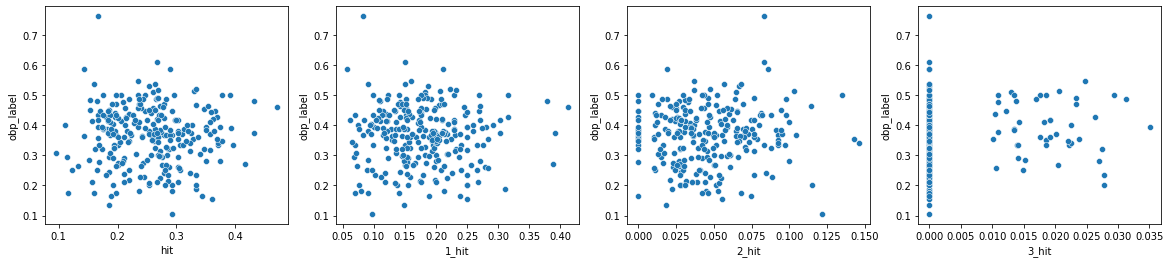

In [ ]:
#타석당 총 안타 / 1루타 / 2루타 / 3루타와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='hit', y='obp_label', data = home_data_4_2021, ax = area1)
sns.scatterplot(x='1_hit', y='obp_label', data = home_data_4_2021, ax = area2)
sns.scatterplot(x='2_hit', y='obp_label', data = home_data_4_2021, ax = area3)
sns.scatterplot(x='3_hit', y='obp_label', data = home_data_4_2021, ax = area4)

plt.show()

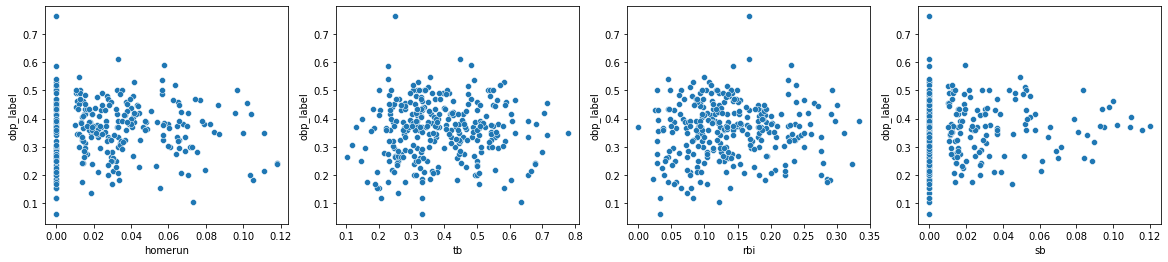

In [ ]:
#타석당 홈런 / 총 루타 / 타점 / 도루와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='homerun', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='tb', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='rbi', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='sb', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

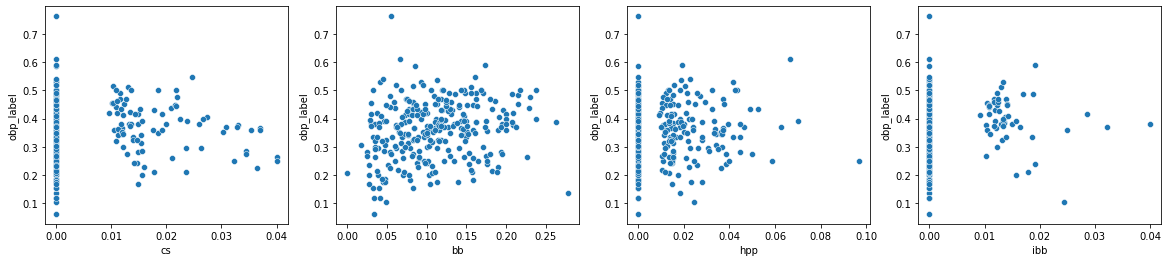

In [ ]:
#타석당 도루실패 / 볼넷 / 몸에맞는볼 / 고의4구와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='cs', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='bb', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='hpp', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='ibb', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

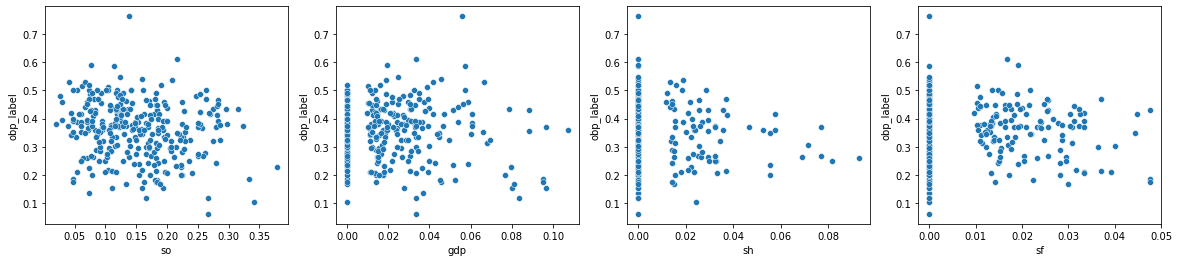

In [ ]:
#타석당 삼진 / 병살타 / 희생번트 / 희생플라이와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='so', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='gdp', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='sh', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='sf', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

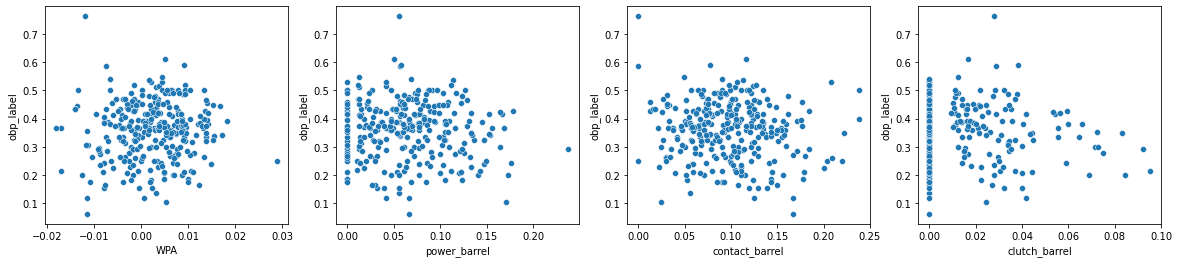

In [ ]:
#타석당 WPA / 파워 배럴 / 컨택 배럴 / 클러치 배럴와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='WPA', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='power_barrel', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='contact_barrel', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='clutch_barrel', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

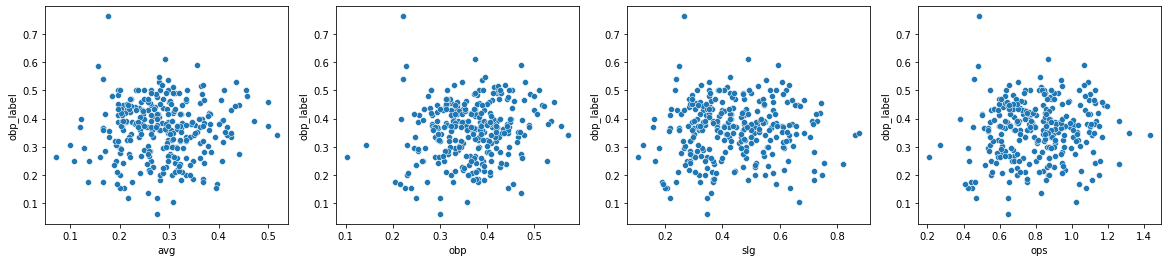

In [ ]:
# 타율 / 출루율 / 장타율 / OPS 와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='avg', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='obp', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='slg', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='ops', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

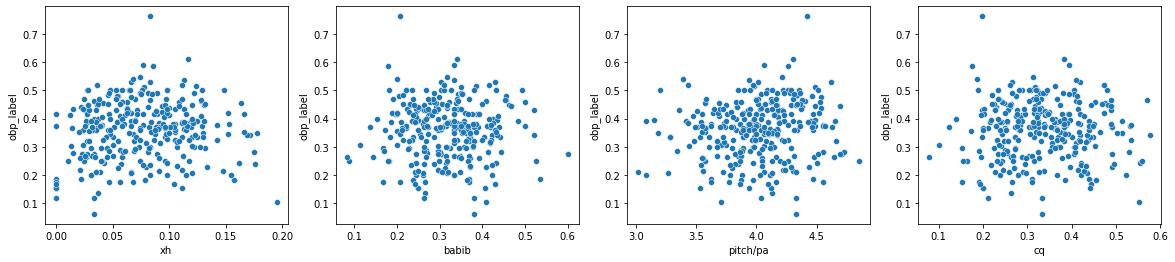

In [ ]:
#타석당 장타 / 바빕 / 투구수 / 컨택 퀄리티와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='xh', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='babib', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='pitch/pa', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='cq', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

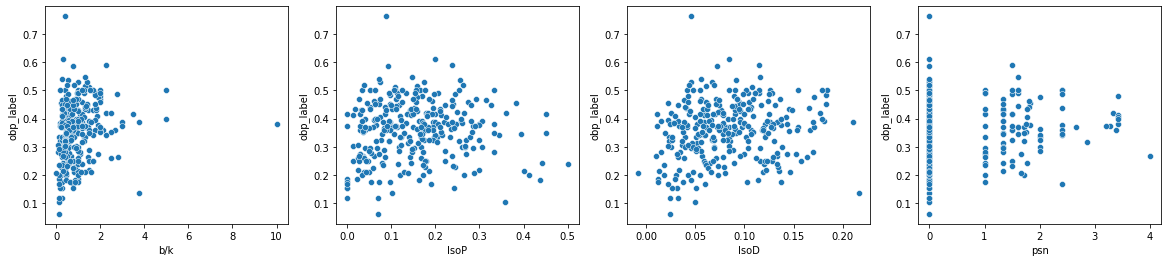

In [ ]:
#타석당 볼삼비 / 순장타율 / 순출루율 / 호타준족 수치와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='b/k', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='IsoP', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='IsoD', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='psn', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

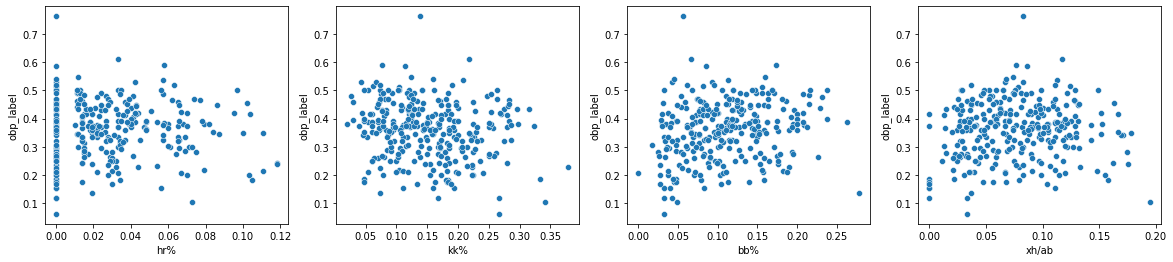

In [ ]:
#타석당 홈런 비율 / 삼진 비율 / 볼넷 비율 / 장타 비율과 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='hr%', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='kk%', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='bb%', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='xh/ab', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

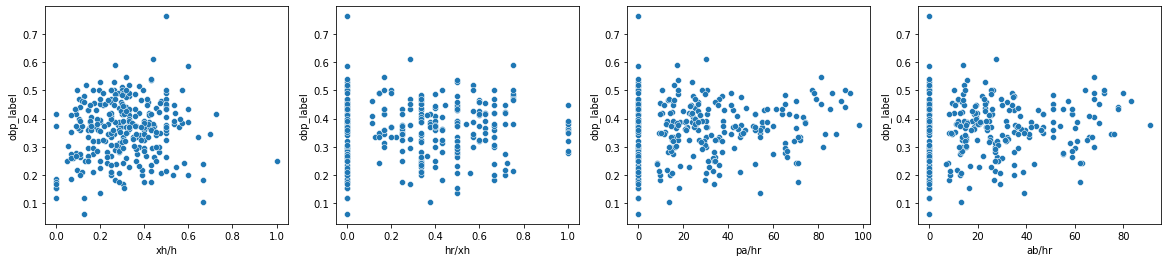

In [ ]:
#안타당 장타비율 / 장타당 홈런 비율 / 홈런 당 타석 / 홈런 당 타수와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (20,4))

area1 = fig.add_subplot(1,4,1)
area2 = fig.add_subplot(1,4,2)
area3 = fig.add_subplot(1,4,3)
area4 = fig.add_subplot(1,4,4)

sns.scatterplot(x='xh/h', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='hr/xh', y='obp_label', data = home_data_3_2021, ax = area2)
sns.scatterplot(x='pa/hr', y='obp_label', data = home_data_3_2021, ax = area3)
sns.scatterplot(x='ab/hr', y='obp_label', data = home_data_3_2021, ax = area4)

plt.show()

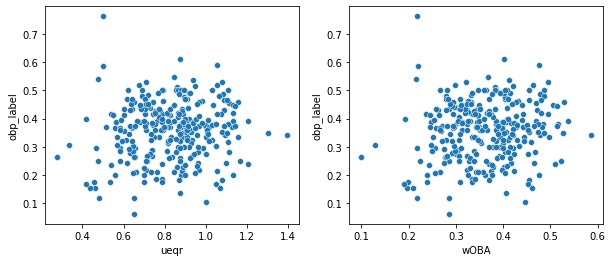

In [ ]:
#UEQR / wOBA와 예측 출루율과의 산점도
fig  = plt.figure(figsize = (10,4))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

sns.scatterplot(x='ueqr', y='obp_label', data = home_data_3_2021, ax = area1)
sns.scatterplot(x='wOBA', y='obp_label', data = home_data_3_2021, ax = area2)

plt.show()

In [ ]:
home_data_3_2021.corrwith(home_data_3_2021['obp_label'], method='spearman')

babib      -0.031477
pitch/pa    0.148031
cq         -0.005370
b/k         0.262228
psn         0.077450
hr%         0.029268
kk%        -0.171062
bb%         0.212189
xh/ab       0.083189
xh/h        0.082447
hr/xh       0.074185
pa/hr       0.115187
ab/hr       0.105747
ueqr        0.078425
wOBA        0.094622
dtype: float64

In [ ]:
home_data_3_2021.corr(method='pearson')

,babib,pitch/pa,cq,b/k,psn,hr%,kk%,bb%,xh/ab,xh/h,hr/xh,pa/hr,ab/hr,ueqr,wOBA
babib,1.000000,0.081129,0.781135,0.001583,0.140997,0.064963,0.043431,-0.104755,0.295543,-0.189127,-0.085872,0.013350,0.020977,0.712497,0.728907
pitch/pa,0.081129,1.000000,0.087769,0.108331,0.208098,-0.016510,0.245949,0.451115,-0.029192,0.060590,0.115750,0.228993,0.203417,0.094941,0.139507
cq,0.781135,0.087769,1.000000,-0.112775,0.253348,0.644517,0.259388,-0.090510,0.719281,0.297526,0.370690,0.007130,0.013761,0.907134,0.876970
b/k,0.001583,0.108331,-0.112775,1.000000,-0.065135,-0.134778,-0.577262,0.620968,-0.188229,-0.201513,-0.018227,-0.026094,-0.060225,0.176753,0.253447
psn,0.140997,0.208098,0.253348,-0.065135,1.000000,0.226063,0.107409,0.145655,0.190622,0.118848,0.244000,0.307056,0.299816,0.300393,0.263412
hr%,0.064963,-0.016510,0.644517,-0.134778,0.226063,1.000000,0.241520,-0.068181,0.678080,0.529068,0.788146,-0.022763,-0.018094,0.614753,0.551432
kk%,0.043431,0.245949,0.259388,-0.577262,0.107409,0.241520,1.000000,-0.145062,0.239616,0.344497,0.234071,0.106906,0.118260,-0.090062,-0.110944
bb%,-0.104755,0.451115,-0.090510,0.620968,0.145655,-0.068181,-0.145062,1.000000,-0.124351,0.007602,0.091982,0.181055,0.123006,0.147319,0.226033
xh/ab,0.295543,-0.029192,0.719281,-0.188229,0.190622,0.678080,0.239616,-0.124351,1.000000,0.814937,0.290450,-0.000355,0.008435,0.666181,0.609960
xh/h,-0.189127,0.060590,0.297526,-0.201513,0.118848,0.529068,0.344497,0.007602,0.814937,1.000000,0.234063,0.014744,0.015349,0.242832,0.197667
